In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tenfem

In [2]:
def p1_shape_fn(r):
    """
    
    Returns:
        shape_fn_vals: A `Tensor` of shape `[..., n, 2]
        shape_fn_grads: A `Tensor` of shape `[2, ..., n, 2]`
    """
    shape_fn_vals = tf.concat((1 - r[..., tf.newaxis], r[..., tf.newaxis]), axis=-1)
    shape_fn_grads = tf.concat((-tf.ones_like(r)[..., tf.newaxis], 
                                 tf.ones_like(r)[..., tf.newaxis]), axis=-1)[tf.newaxis, ...]

    return shape_fn_vals, shape_fn_grads

In [3]:
def gauss_quad_nodes_and_weights(order: int, dtype=tf.DType = tf.float32):
    """ The nodes and weights for Gaussian quadrature on a triangle element.

    Args:
        order: Python integer, the number of quadrature nodes.
        dtype: A `tf.DType` object giving the data-type of the quadrature nodes
          and weights.

    Returns:
        weights: A float `Tensor` like giving the weights of the
          gaussian quadrature rule of `order`, with data-type equal
          to `dtype`.
        nodes: A float `Tensor` giving the nodes of the Gaussian
          quadrature rule of shape [len(weights), 2], with data-type
          equal to `dtype`.

    Raises:
        NotImplementedError: If order is not in [1, 2, 3].
    """
    if order == 1:
        weights = tf.constant([1], dtype=dtype)
        nodes = tf.constant([[0.5],], dtype=dtype)
    elif order == 2:
        weights = tf.constant([1., 1.], dtype=dtype)
        nodes = tf.constant([[0.21132486540518708,] 
                             [0.7886751345948129,]], dtype=dtype)
    elif order == 3:
        weights = tf.constant([5./9, 8./9. 5./9], dtype=dtype)
        nodes = tf.constant([[0.1127016653792583, ]
                             [0.5, ],
                             [0.8872983346207417, ]], dtype=dtype)
    else:
        raise NotImplementedError('Order {} not currently implemented.'.format(order))


gauss_quad_nodes = {
    1: [0.5 ],
    2: [0.21132486540518708, 0.7886751345948129],
    3: [0.1127016653792583, 0.5, 0.8872983346207417],
}

In [5]:
rr = np.linspace(0., 1., 4)

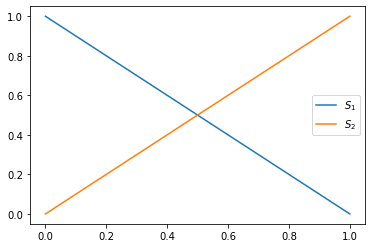

In [6]:
xx = np.linspace(0., 1.)
s, ds = p1_shape_fn(xx)

fig, ax = plt.subplots()
ax.plot(xx, s[..., 0], label='$S_1$')
ax.plot(xx, s[..., 1], label='$S_2$')
ax.legend()
plt.show()

In [7]:
n_nodes = 5
nodes = np.linspace(-1.3, 0.5, n_nodes)[:, np.newaxis]
elements = np.column_stack((np.arange(0, 4), np.arange(1, 5)))
boundary_elements = [[0, ], [4, ]]

mesh = tenfem.mesh.IntervalMesh(nodes, elements, boundary_elements)

In [ ]:
IntervalElement = tenfem.reference_elements.IntervalElement

element = IntervalElement()

In [9]:
def get_quadrature_nodes(order, mesh):
    """
    
    Args:
        mesh: A `tenfem.mesh.BaseMesh` object giving the mesh we want
          to find the quadrature nodes on.

    Returns:
        quadrature_nodes: A float `tf.Tensor` of shape
         `[mesh.n_elements, n_quadrature_nodes, mesh.spatial_dimension]`
         giving the coordinates of the quadrature nodes on the mesh.
    
    """
    quad_nodes = np.array(gauss_quad_nodes[order])
    element_nodes = tf.gather(mesh.nodes, mesh.elements)
    
    shape_fn_vals, _ = p1_shape_fn(quad_nodes)
    return tf.reduce_sum(element_nodes[..., tf.newaxis, :, :] 
                         * shape_fn_vals[..., tf.newaxis], axis=-2)

In [10]:
order = 3
quad_nodes = get_quadrature_nodes(order, mesh)
print(quad_nodes.shape)

(4, 3, 1)


In [11]:
mesh.nodes

<tf.Tensor: shape=(5, 1), dtype=float64, numpy=
array([[-1.3 ],
       [-0.85],
       [-0.4 ],
       [ 0.05],
       [ 0.5 ]])>

In [12]:
quad_nodes

<tf.Tensor: shape=(4, 3, 1), dtype=float64, numpy=
array([[[-1.24928425e+00],
        [-1.07500000e+00],
        [-9.00715749e-01]],

       [[-7.99284251e-01],
        [-6.25000000e-01],
        [-4.50715749e-01]],

       [[-3.49284251e-01],
        [-1.75000000e-01],
        [-7.15749421e-04]],

       [[ 1.00715749e-01],
        [ 2.75000000e-01],
        [ 4.49284251e-01]]])>